In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from seaborn import set_style
set_style("whitegrid")

In [2]:
bridge = pd.read_csv('./CoverMyMeds_data/bridge.csv')
dim_claims = pd.read_csv('./CoverMyMeds_data/dim_claims.csv')
dim_date = pd.read_csv('./CoverMyMeds_data/dim_date.csv')
dim_pa = pd.read_csv('./CoverMyMeds_data/dim_pa.csv')

In [90]:
bridge.tail(80)

,dim_claim_id,dim_pa_id,dim_date_id
1335496,1335497,555929.0,1095
1335497,1335498,NaN,1095
1335498,1335499,NaN,1095
1335499,1335500,NaN,1095
1335500,1335501,NaN,1095
...,...,...,...
1335571,1335572,555950.0,1095
1335572,1335573,NaN,1095
1335573,1335574,555951.0,1095
1335574,1335575,NaN,1095


In [106]:
nan_removed = bridge[bridge['dim_pa_id'].notna()].value_counts(['dim_date_id']).sort_index()
merged_date = nan_removed.to_frame().merge(dim_date, on=['dim_date_id'], how='outer')
merged_date.rename(columns={0:'number_of_PA'}, inplace = True)
merged_date['number_of_PA'].sum()
groupby_month = merged_date.groupby(["calendar_year", "calendar_month"])['number_of_PA'].sum()
# groupby_month = groupby_month[groupby_month['number_of_PA'].notna()]
groupby_month.to_dataframe()
groupby_month.plot(kind = 'bar', figsize=(16, 10), title = 'PAs by calendar month')



AttributeError: 'Series' object has no attribute 'to_dataframe'

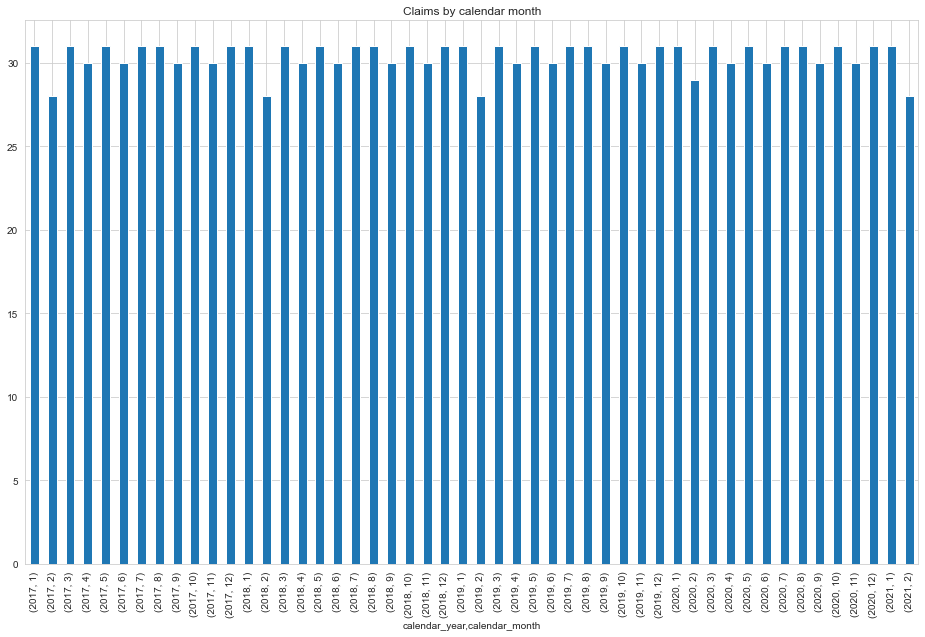

,dim_claim_id,dim_pa_id,dim_date_id
0,1,1.0,1
1,2,NaN,1
2,3,2.0,1
3,4,NaN,1
4,5,NaN,1
